In [5]:
import time
import pandas as pd
import random
import numpy as np
import matplotlib as plt

In [7]:
# from numpy.random import default_rng

# Define ANSI escape sequences for coloring terminal outputs
BLUE = '\033[38;5;19m' # Player 1
GREEN = '\033[0;32m' # Player 2
BOLD = '\033[1m'
RESET = '\033[0m'

class Deck:
    def __init__(self):
        # Initialize the original deck with 28 zeros and 4 each of 1s, 2s, and 3s
        self.original_deck = np.array([0] * 28 + [1] * 4 + [2] * 4 + [3] * 4)
        # Copy the original deck to avoid modifying it directly
        self.deck = self.original_deck.copy()

    def shuffle(self):
        # Shuffle the copied deck in place
        # default_rng().shuffle(self.deck)
        np.random.shuffle(self.deck)
        # Split the shuffled deck into two parts and return as lists
        print(f"\nPlayer 1: {self.deck[:20]}")
        print(f"Player 2: {self.deck[20:]}\n")
        return list(self.deck[:20]), list(self.deck[20:])

class Player:
    def __init__(self, name, cards):
        # Initialize the player with a name and a list of cards
        self.name = name
        self.cards = cards

    def play_card(self):
        # Play the top card from the player's deck if available
        if self.cards:
            return self.cards.pop(0)
        return None

    def take_pile(self, pile):
        # Add the pile of cards to the player's deck
        self.cards.extend(pile)

    def has_cards(self):
        # Check if the player has any cards left
        return bool(self.cards)

class Game:
    def __init__(self):
        # Initialize the game by shuffling the deck and creating two players
        deck = Deck()
        player1_cards, player2_cards = deck.shuffle()
        self.player1 = Player(f"{BLUE}Player 1", player1_cards)
        self.player2 = Player(f"{GREEN}Player 2", player2_cards)
        self.table = []  # Cards on the table
        self.current_player = self.player1  # Player 1 starts
    
    def switch_player(self):
        # Switch the current player to the other player
        self.current_player = self.player2 if self.current_player == self.player1 else self.player1

    def play_turn(self):
        # Current player plays a card
        # print(self.current_player.cards)
        card = self.current_player.play_card()
        if card is not None:
            self.table.append(card)
            print(f"{self.current_player.name}:{RESET} {card}")
            if card > 0:  # If a face card is played
                self.handle_face_card(card)
        self.switch_player() 

    def handle_face_card(self, turns):
        # Handle the scenario when a face card is played
        face_card_found = False
        opponent = self.player2 if self.current_player == self.player1 else self.player1
        while turns > 0 and opponent.has_cards():
            face_card_found = False
            next_card = opponent.play_card()
            if next_card is not None:
                self.table.append(next_card)
                print(f"{opponent.name}:{RESET} {next_card}")
                if next_card > 0:
                    face_card_found = True
                    self.current_player = opponent
                    turns = next_card
                    opponent = self.player2 if self.current_player == self.player1 else self.player1
                else:
                    turns -= 1

        if not face_card_found:
            self.current_player.take_pile(self.table)
            print(f"{self.current_player.name} takes the pile{RESET} \n")
            # Switch the current player to the other player
            self.switch_player()
            self.table.clear()

    def play_game(self):
        # Main game loop: players take turns until one runs out of cards
        while self.player1.has_cards() and self.player2.has_cards():
            self.play_turn()

        # Announce the winner
        if not self.player1.has_cards():
            print(f"\n{GREEN}{BOLD}Player 2 wins!{RESET}\n \n")
        else:
            print(f"\n{BLUE}{BOLD}Player 1 wins!{RESET}\n \n")

# Start the game if this script is run directly
if __name__ == "__main__":
    game = Game()
    game.play_game()



Player 1: [0 0 0 0 2 0 0 0 0 0 0 0 3 1 0 3 0 0 0 3]
Player 2: [2 0 1 0 1 2 0 0 0 0 2 1 0 0 0 0 0 0 3 0]

Player 1: 0
Player 2: 2
Player 1: 0
Player 1: 0
Player 2 takes the pile 

Player 2: 0
Player 1: 0
Player 2: 1
Player 1: 2
Player 2: 0
Player 2: 1
Player 1: 0
Player 2 takes the pile 

Player 2: 2
Player 1: 0
Player 1: 0
Player 2 takes the pile 

Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 2
Player 1: 3
Player 2: 1
Player 1: 1
Player 2: 0
Player 1 takes the pile 

Player 1: 0
Player 2: 0
Player 1: 3
Player 2: 0
Player 2: 0
Player 2: 0
Player 1 takes the pile 

Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 3
Player 1: 0
Player 1: 3
Player 2: 0
Player 2: 0
Player 2: 2
Player 1: 0
Player 1: 0
Player 2 takes the pile 

Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 1
Player 1: 0
Player 2 takes the pile 

Player 2: 2
Player 1: 0
Player 1: 2
Player 2: 0
Player 2: 1
Play

In [31]:
game = Game()
game.player1.cards = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 1, 1]
game.player2.cards = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 1, 1]
game.play_game()



Player 1: [1 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 2]
Player 2: [2 3 3 0 0 0 1 2 0 2 0 0 0 0 0 3 0 1 0 0]

Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 0
Player 2: 0
Player 1: 3
Player 2: 3
Player 1: 3
Player 2: 3
Player 1: 2
Player 2: 2
Player 1: 2
Player 2: 2
Player 1: 1
Player 2: 1
Player 1: 1
Player 2: 1

Player 2 wins!
 



In [3]:
# single pelagaletto match without print statements

#import random
#import numpy as np

class Deck:
    def __init__(self):
        # Initialize the original deck with 28 zeros and 4 each of 1s, 2s, and 3s
        self.original_deck = np.array([0] * 28 + [1] * 4 + [2] * 4 + [3] * 4)
        # np.random.shuffle(self.original_deck)
        # Copy the original deck to avoid modifying it directly
        self.deck = self.original_deck.copy()

    def shuffle(self):
        # Shuffle the copied deck in place
        np.random.shuffle(self.deck)
        # Split the shuffled deck into two parts and return as lists
        return list(self.deck[:20]), list(self.deck[20:])

class Player:
    def __init__(self, name, cards):
        # Initialize the player with a name and a list of cards
        self.name = name
        self.cards = cards

    def play_card(self):
        # Play the top card from the player's deck if available
        if self.cards:
            return self.cards.pop(0)
        return None

    def take_pile(self, pile):
        # Add the pile of cards to the player's deck
        self.cards.extend(pile)

    def has_cards(self):
        # Check if the player has any cards left
        return bool(self.cards)

class Game:
    def __init__(self):
        # Initialize the game by shuffling the deck and creating two players
        deck = Deck()
        player1_cards, player2_cards = deck.shuffle()
        self.player1 = Player(0, player1_cards)
        self.player2 = Player(1, player2_cards)
        self.table = []  # Cards on the table
        self.current_player = self.player1  # Player 1 starts        
        
    def switch_player(self):
        # Switch the current player to the other player
        self.current_player = self.player2 if self.current_player == self.player1 else self.player1

    def play_turn(self):
        # Current player plays a card
        card = self.current_player.play_card()
        if card is not None:
            self.table.append(card)
            if card > 0:  # If a face card is played
                self.handle_face_card(card)
        self.switch_player()

    def handle_face_card(self, turns):
        # Handle the scenario when a face card is played
        face_card_found = False
        opponent = self.player2 if self.current_player == self.player1 else self.player1
        while turns > 0 and opponent.has_cards():
            face_card_found = False
            next_card = opponent.play_card()
            if next_card is not None:
                self.table.append(next_card)
                if next_card > 0:
                    face_card_found = True
                    self.current_player = opponent
                    turns = next_card
                    opponent = self.player2 if self.current_player == self.player1 else self.player1
                else:
                    turns -= 1

        if not face_card_found:
            self.current_player.take_pile(self.table)
            self.switch_player()
            self.table.clear()

    def play_game(self):
        # Main game loop: players take turns until one runs out of cards
        while self.player1.has_cards() and self.player2.has_cards():
            self.play_turn()

        # Announce the winner
        if not self.player1.has_cards():
            return 1
        else:
            return 0

def simulate_games(n_sims):
    for i in range(n_sims):
        game = Game()
        game.play_game()

'\nstart_time = time.perf_counter()\nsimulate_games(100000)\nend_time = time.perf_counter()\nprint(f"Function executed in {end_time - start_time:.2f} seconds")\n'

In [5]:
# collecting data while simulating

def simulate_games_and_collect_data(n_sims):
    wins = np.empty(n_sims)  # counting how many times player 2 wins (win = 1). Player 2 always starts second at the beginning of the entire game
    ones = np.empty(n_sims) # number of 1 that player 2 has at the beginning of the match
    twos = np.empty(n_sims) # number of 2 that player 2 has at the beginning of the match
    threes = np.empty(n_sims) # number of 3 that player 2 has at the beginning of the match
    avg_distance_face_cards = np.empty(n_sims) # know that this is probably biased as if you have a higher number of face cards, they are more likely to be closed together
    face_cards_distance_1 = np.empty(n_sims) # number of face cards that are one after the other
    face_cards_distance_2 = np.empty(n_sims) # number of face cards with one 0 card between them
    face_cards_distance_3 = np.empty(n_sims) # number of face cards with two 0 cards between them
    # number_of_turns = np.empty(n_sims) # a turn ends when a player takes the pile
    # number_of_cards_played = np.empty(n_sims) # counting every single card played by both players
    # cards_played_per_turn = np.empty(n_sims) # fraction of two values above

    for i in range(n_sims):
        game = Game()
        cards_player_2 = game.player2.cards

        # Count the number of 1s, 2s, and 3s
        ones[i] = cards_player_2.count(1)
        twos[i] = cards_player_2.count(2)
        threes[i] = cards_player_2.count(3)
        
        # Calculate face card distances (1, 2, and 3)
        face_card_positions = [idx for idx, card in enumerate(cards_player_2) if card in {1, 2, 3}]
        num_face_cards = len(face_card_positions)
        
        if num_face_cards > 1:
            distances = np.diff(face_card_positions)
            avg_distance_face_cards[i] = np.mean(distances)
            face_cards_distance_1[i] = np.sum(distances == 1)
            face_cards_distance_2[i] = np.sum(distances == 2)
            face_cards_distance_3[i] = np.sum(distances == 3)
        else:
            avg_distance_face_cards[i] = 0
            face_cards_distance_1[i] = 0
            face_cards_distance_2[i] = 0
            face_cards_distance_3[i] = 0
            
        wins[i] = game.play_game()

    # Create a pandas DataFrame from the collected data
    data = pd.DataFrame({
        "wins": wins,
        "ones": ones,
        "twos": twos,
        "threes": threes,
        "avg_distance_face_cards": avg_distance_face_cards,
        "face_cards_distance_1": face_cards_distance_1,
        "face_cards_distance_2": face_cards_distance_2,
        "face_cards_distance_3": face_cards_distance_3,
        # "number_of_turns": number_of_turns,
        # "number_of_cards_played": number_of_cards_played,
        # "cards_played_per_turn": cards_played_per_turn
    })

    return data

start_time = time.perf_counter()
data = simulate_games_and_collect_data(1000000)
end_time = time.perf_counter()
print(f"Function executed in {end_time - start_time:.2f} seconds"

Function executed in 225.72 seconds


In [192]:
data['wins'] = data['wins'].astype('category')
# Convert columns to integers
data['ones'] = data['ones'].astype(int)
data['twos'] = data['twos'].astype(int)
data['threes'] = data['threes'].astype(int)
data['face_cards_distance_1'] = data['face_cards_distance_1'].astype(int)
data['face_cards_distance_2'] = data['face_cards_distance_2'].astype(int)
data['face_cards_distance_3'] = data['face_cards_distance_3'].astype(int)
data.describe(include='all')

,wins,ones,twos,threes,avg_distance_face_cards,face_cards_distance_1,face_cards_distance_2,face_cards_distance_3
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,503580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.000813,2.000315,2.000532,3.146458,1.607602,1.123265,0.774671
std,NaN,0.961181,0.961067,0.960978,1.136836,1.217315,1.024188,0.842929
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,1.000000,1.000000,2.428571,1.000000,0.000000,0.000000
50%,NaN,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000
75%,NaN,3.000000,3.000000,3.000000,3.600000,2.000000,2.000000,1.000000


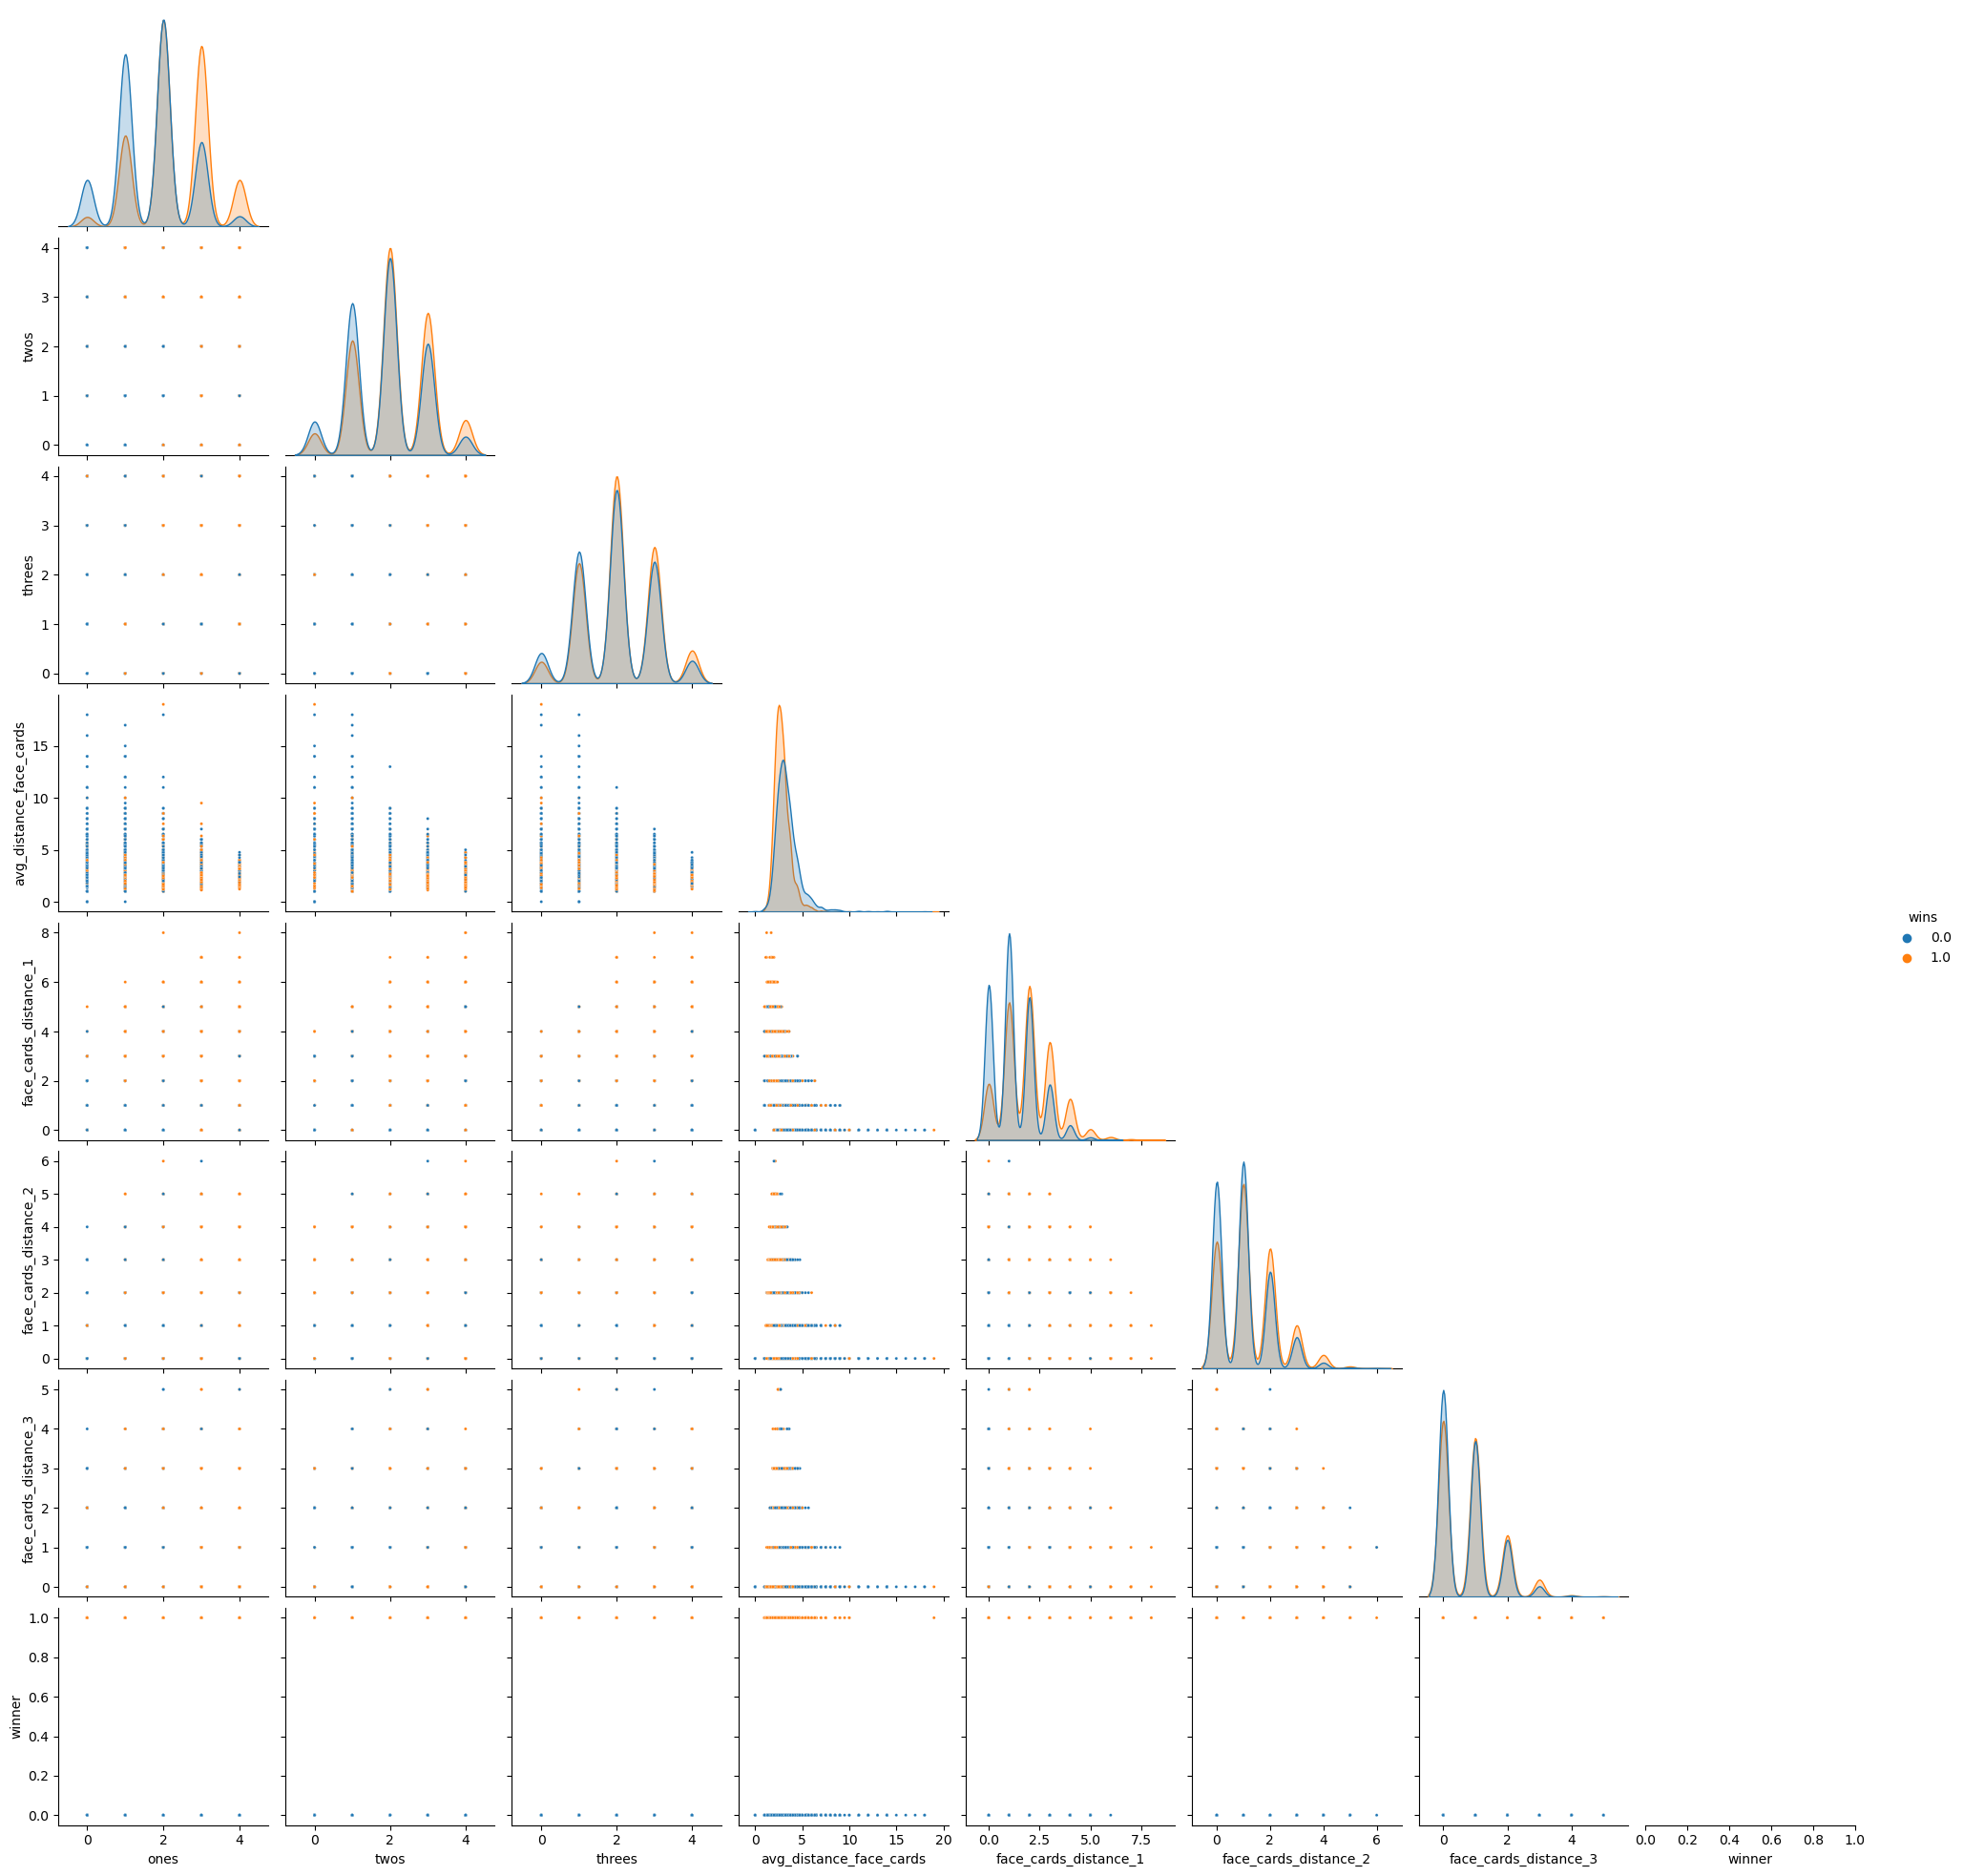

In [136]:
import seaborn as sns
sns.pairplot(data=data.sample(10000), hue="wins", corner = 'True',plot_kws={'s': 5})


In [77]:
def calculate_win_rate(df, distances=True):
    # Ensure the 'wins' column is of numeric type
    df['wins'] = pd.to_numeric(df['wins'], errors='raise')
    
    # Group by quantities of ones, twos, and threes and calculate the win rate and count of observations
    if distances:
        grouped_df = df.groupby(['ones', 'twos', 'threes', 'face_cards_distance_1', 'face_cards_distance_2', 'face_cards_distance_3']).agg(
            win_rate=('wins', 'mean'),
            count=('wins', 'size')
        ).reset_index()
    else:
        grouped_df = df.groupby(['ones', 'twos', 'threes']).agg(
            win_rate=('wins', 'mean'),
            count=('wins', 'size')
        ).reset_index()
    
    return grouped_df
       
# Ensure the 'wins' column is of numeric type
data['wins'] = pd.to_numeric(data['wins'], errors='raise')

# Calculate win rate
win_rate_df = calculate_win_rate(data)

# Display the results
win_rate_df

,ones,twos,threes,face_cards_distance_1,face_cards_distance_2,face_cards_distance_3,win_rate,count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,21
1,0.0,0.0,1.0,0.0,0.0,0.0,0.004975,201
2,0.0,0.0,2.0,0.0,0.0,0.0,0.029412,408
3,0.0,0.0,2.0,0.0,0.0,1.0,0.000000,57
4,0.0,0.0,2.0,0.0,1.0,0.0,0.020833,48
...,...,...,...,...,...,...,...,...
5483,4.0,4.0,4.0,7.0,3.0,1.0,1.000000,3
5484,4.0,4.0,4.0,7.0,4.0,0.0,1.000000,1
5485,4.0,4.0,4.0,8.0,1.0,1.0,1.000000,1
5486,4.0,4.0,4.0,8.0,1.0,2.0,1.000000,1


In [79]:
# Calculate win rate
win_rate_df_simple = calculate_win_rate(data,distances=False)

# Display the results
win_rate_df_simple

,ones,twos,threes,win_rate,count
0,0.0,0.0,0.0,0.000000,21
1,0.0,0.0,1.0,0.004975,201
2,0.0,0.0,2.0,0.025952,578
3,0.0,0.0,3.0,0.051020,588
4,0.0,0.0,4.0,0.119835,242
...,...,...,...,...,...
120,4.0,4.0,0.0,0.916667,252
121,4.0,4.0,1.0,0.941463,615
122,4.0,4.0,2.0,0.976909,563
123,4.0,4.0,3.0,1.000000,218


In [22]:
data['wins'] = data['wins'].astype('category')

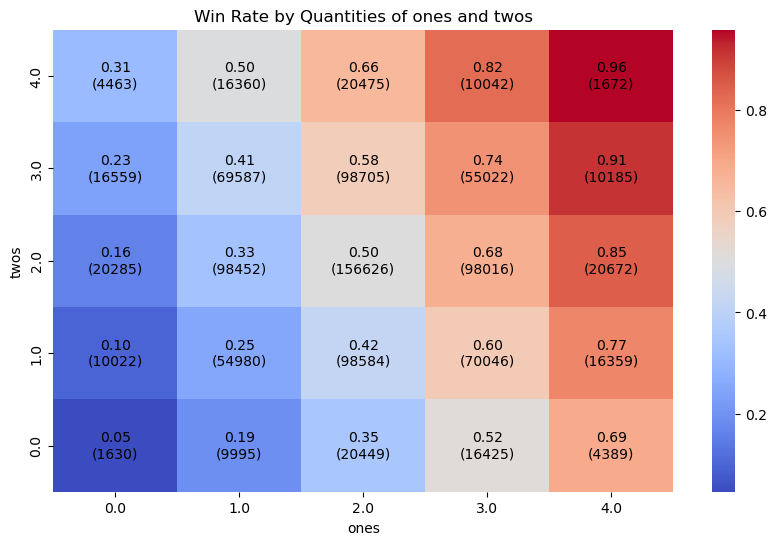

In [188]:
def weighted_avg(values, weights):
    return np.average(values, weights=weights)

def win_rate_heatmap(win_rate_df, str_1, str_2):
    plt.figure(figsize=(10, 6))
    
    # Create a pivot table with custom weighted average aggregation
    pivot_data = win_rate_df.pivot_table(
        index=str_2, 
        columns=str_1, 
        values='win_rate', 
        aggfunc=lambda x: weighted_avg(x, win_rate_df.loc[x.index, 'count'])
    )
    
    # Create a pivot table to get the count
    pivot_count = win_rate_df.pivot_table(
        index=str_2, 
        columns=str_1, 
        values='count', 
        aggfunc='sum'
    )
    
    # Reverse the columns for both pivot_data and pivot_count spo that the x-axis goes from smaller to bigger 
    pivot_data = pivot_data.iloc[ ::-1,:]
    pivot_count = pivot_count.iloc[ ::-1,:]
    
    
    # Create the heatmap
    sns.heatmap(pivot_data, annot=False, fmt=".2f", cmap="coolwarm")
    
    # Add annotations with both the weighted average and the count
    for i in range(pivot_data.shape[0]):
        for j in range(pivot_data.shape[1]):
            value = pivot_data.iloc[i, j]
            count = pivot_count.iloc[i, j]
            if not pd.isna(value) and not pd.isna(count):
                plt.text(j + 0.5, i + 0.5, f'{value:.2f}\n({int(count)})',
                         ha='center', va='center', color='black')
    
    plt.title(f"Win Rate by Quantities of {str_1} and {str_2}")
    plt.xlabel(str_1)
    plt.ylabel(str_2)
    plt.show()
    
win_rate_heatmap(win_rate_df, 'ones', 'twos')

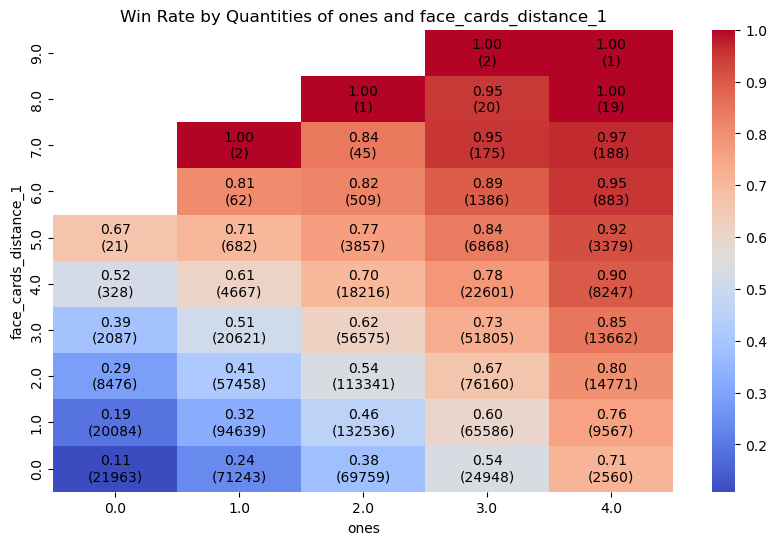

In [166]:
win_rate_heatmap(win_rate_df,'ones','face_cards_distance_1')

# if the annotations are shown only in the first row, you should upgrade seaborn

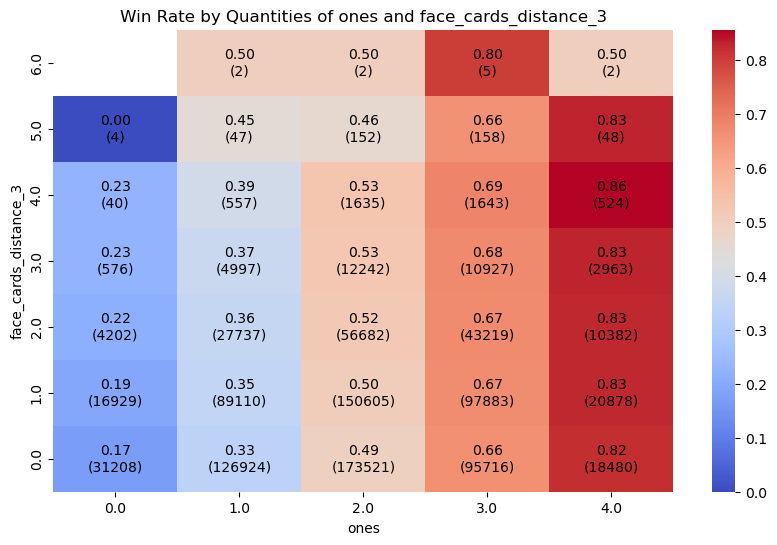

In [168]:
win_rate_heatmap(win_rate_df,'ones','face_cards_distance_3')

In [1]:
def get_weighted_win_rate(win_rate_df, **kwargs):
    match = win_rate_df
    for key, value in kwargs.items():
        match = match[match[key] == value]
    if not match.empty:
        total_count = match['count'].sum()
        weighted_win_rate = (match['win_rate'] * match['count']).sum() / total_count
        return weighted_win_rate, total_count
    else:
        return None

# Example instance
variables = {
    'ones': 2,
    'twos': 2,
    'threes': 1,
    'face_cards_distance_1': 2
}

# Get weighted win rate for the given instance
win_rate = get_weighted_win_rate(win_rate_df, **variables)
if win_rate is not None:
    print(f"The weighted average win rate for the combination {variables} is: {win_rate[0]:.4f}\nResult based on {win_rate[1]} games")
else:
    print(f"No match found for the combination {variables}")


'\ndef get_weighted_win_rate(win_rate_df, **kwargs):\n    match = win_rate_df\n    for key, value in kwargs.items():\n        match = match[match[key] == value]\n    if not match.empty:\n        total_count = match[\'count\'].sum()\n        weighted_win_rate = (match[\'win_rate\'] * match[\'count\']).sum() / total_count\n        return weighted_win_rate, total_count\n    else:\n        return None\n\n# Example instance\nvariables = {\n    \'ones\': 2,\n    \'twos\': 2,\n    \'threes\': 1,\n    \'face_cards_distance_1\': 2\n}\n\n# Get weighted win rate for the given instance\nwin_rate = get_weighted_win_rate(win_rate_df, **variables)\nif win_rate is not None:\n    print(f"The weighted average win rate for the combination {variables} is: {win_rate[0]:.4f}\nResult based on {win_rate[1]} games")\nelse:\n    print(f"No match found for the combination {variables}")\n'

In [9]:
from antonio_models import sklearn_regressors_selector
from sklearn.model_selection import train_test_split

data_sample=data.sample(10000)
y = data_sample['wins']
X = data_sample.drop(columns=['wins'])

'''
y = data['wins']
X = data.drop(columns=['wins'])
'''

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

start_time = time.perf_counter()
best_model_R_squared, best_model_name, best_model, results_table = sklearn_regressors_selector(X_train, y_train,
                                                                         cv_splits=5,
                                                                         random_seed = 100,
                                                                         scale_data = False,
                                                                         timeout= 300,
                                                                         display_advanced_info = True,
                                                                         R_squared_margin_from_best_model = 0.1)
end_time = time.perf_counter()
print(f"Function executed in {end_time - start_time:.2f} seconds")


FEATURES
Number of features: 7
of which dummies: 0
of which non-dummies: 7

DATA TYPES OF FEATURES
float64    7
Name: count, dtype: int64

LIST OF DUMMIES

TARGET
Mean: 0.50
Median: 0.00
SD: 0.50
Min: 0.00
Max: 1.00
Observations: 8000

---------------------------------------------------------------------------------------------------------------------------------------

MODELS
Number of models: 55
Non parallel: 37
Parallel: 14
Instantiating error 
(requiring more parameters, likely meta estimators): 4

LIST OF NON PARALLEL MODELS
ARDRegression
AdaBoostRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ExtraTreeRegressor
GammaRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KernelRidge
Lars
Lasso
LassoLars
LassoLarsIC
LinearSVR
MLPRegressor
MultiTaskElasticNet
MultiTaskLasso
NuSVR
OrthogonalMatchingPursuit
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
QuantileRe

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


y = data['wins']
X = data.drop(columns=['wins'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# List of models to evaluate
models = {
    'Basic Logistic Regression': LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000),
    'Ridge Logistic Regression (L2)': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),
    'Lasso Logistic Regression (L1)': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000),
    'Elastic Net Logistic Regression': LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=1000, cv=5)
}

# Dictionary to store evaluation metrics
results = {
    'Model': [],
    'Accuracy': [],
    'ROC AUC Score': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

# Train each model and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['ROC AUC Score'].append(roc_auc)
    results['Confusion Matrix'].append(conf_matrix)
    results['Classification Report'].append(class_report)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Print results
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full content of each cell

for index, row in results_df.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Accuracy: {row['Accuracy']}")
    print(f"ROC AUC Score: {row['ROC AUC Score']}")
    print(f"Confusion Matrix:\n{row['Confusion Matrix']}")
    print(f"Classification Report:\n{row['Classification Report']}")
    print("\n" + "="*80 + "\n")


Model: Basic Logistic Regression
Accuracy: 0.65555
ROC AUC Score: 0.6555891501391886
Confusion Matrix:
[[6518 3371]
 [3518 6593]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65      9889
         1.0       0.66      0.65      0.66     10111

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000



Model: Ridge Logistic Regression (L2)
Accuracy: 0.65555
ROC AUC Score: 0.6555891501391886
Confusion Matrix:
[[6518 3371]
 [3518 6593]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65      9889
         1.0       0.66      0.65      0.66     10111

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000



Model: Lasso Logistic Regressio

In [63]:
# Feature names for better interpretation

# Train the best model (Basic Logistic Regression) on the entire dataset
best_model = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
best_model.fit(X, y)

# Extract the coefficients and intercept
coefficients = best_model.coef_[0]
intercept = best_model.intercept_[0]

# Calculate baseline odds and probability
baseline_odds = np.exp(intercept)
baseline_probability = baseline_odds / (1 + baseline_odds)

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Multiplier': np.exp(coefficients),
    'Percentage Change in Odds': (np.exp(coefficients) - 1) * 100
})

# Sort the coefficients by absolute value (importance)
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False).drop(columns='Absolute Coefficient')

# Define ASCII escape codes for formatting
BOLD = "\033[1m"
RESET = "\033[0m"
GREEN = "\033[92m"
CYAN = "\033[96m"
YELLOW = "\033[93m"

print("\nFor every one-unit increase in Feature_A, the log-odds of the outcome increase by the coefficient.")
print("If Feature_A increases by one unit, the odds of the outcome occurring are multiplied by e^(coefficient).")
print("Baseline odds (e^B_0) represent how many times more likely the event is to occur than not occur when all predictor variables are zero.")
print("Baseline probability (e^B_0 / 1 + e^B_0) is the probability of the event occurring when all predictor variables are zero.")

# Print the coefficients and interpretations with formatting
print(f"\n{BOLD}{CYAN}Model Coefficients and Interpretations:{RESET}\n")
print(f"{BOLD}Intercept (Baseline Log-Odds):{RESET} {intercept:.2f}")
print(f"{BOLD}Baseline Odds:{RESET} {baseline_odds:.2f}")
print(f"{BOLD}Baseline Probability:{RESET} {baseline_probability:.2f}\n")

print(coefficients_df.to_string(index=False, float_format="%.4f"))

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print model evaluation metrics
print(f"\n{BOLD}{CYAN}Model Evaluation Metrics:{RESET}\n")
print(f"{BOLD}Accuracy:{RESET} {accuracy:.2f}")
print(f"{BOLD}ROC AUC Score:{RESET} {roc_auc:.2f}\n")

print(f"{BOLD}{CYAN}Confusion Matrix:{RESET}")
print(pd.DataFrame(conf_matrix, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"]))

print(f"\n{BOLD}{CYAN}Classification Report:{RESET}\n")
print(f"{BOLD}Precision:{END} The ratio of correctly predicted positive observations to the total predicted positives.")
print(f"{BOLD}Formula:{END} Precision = TP / (TP + FP)\n")

print(f"{BOLD}Recall (Sensitivity):{END} The ratio of correctly predicted positive observations to the all observations in actual class.")
print(f"{BOLD}Formula:{END} Recall = TP / (TP + FN)\n")

print(f"{BOLD}F1-Score:{END} The weighted average of Precision and Recall.")
print(f"{BOLD}Formula:{END} F1-Score = 2 * (Precision * Recall) / (Precision + Recall)\n")

print(f"{BOLD}Macro Average:{END} computes metric (e.g., precision, recall, F1-score) independently for each class and then takes the average, treating all classes equally.")
print(f"{BOLD}Weighted Average:{END} metric weighted by the number of instances (support) in each class.\n")

print(f"{BOLD}Support:{END} The number of actual occurrences of the class in the dataset.\n")

print(class_report)


For every one-unit increase in Feature_A, the log-odds of the outcome increase by the coefficient.
If Feature_A increases by one unit, the odds of the outcome occurring are multiplied by e^(coefficient).
Baseline odds (e^B_0) represent how many times more likely the event is to occur than not occur when all predictor variables are zero.
Baseline probability (e^B_0 / 1 + e^B_0) is the probability of the event occurring when all predictor variables are zero.

Model Coefficients and Interpretations:

Intercept (Baseline Log-Odds): -2.36
Baseline Odds: 0.09
Baseline Probability: 0.09

                Feature  Coefficient  Odds Multiplier  Percentage Change in Odds
                   ones       0.6085           1.8377                    83.7666
  face_cards_distance_1       0.2874           1.3330                    33.2992
                   twos       0.1752           1.1915                    19.1539
  face_cards_distance_2       0.1410           1.1514                    15.1414
      